In [3]:
#Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
#Step 2: Load Dataset
# Load dataset into pandas dataframe
df= pd.read_csv("emails.csv")
# Display first 5 rows
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [7]:
#Step 3: Preprocessing (Features & Target)
# Features: all columns except 'Email No.' and 'Prediction'
X = df.iloc[:, 1:-1]

#Target: 'Prediction' column
y = df['Prediction']

# Display shapes
print("\nFeatures shape:", X.shape)
print("\nTarget shape:", y.shape, "\n")






Features shape: (5172, 3000)

Target shape: (5172,) 



In [9]:
# Step 4: Train-Test Split of the dataset
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2,random_state=42)


In [10]:
# Step 5: Feature Scaling (Important for KNN)
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)


In [11]:
#Step 6: Train KNN Classifier
#KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [12]:
y_pred_knn=knn.predict(X_test_scaled)

In [14]:
# Step 7: Train SVM Classifier
# SVM Model with Linear kernel
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)

# Predict
y_pred_svm =svm.predict(X_test_scaled)




-----------------------KNN Model------------------------------

Confusion Matrix:
 [[593 146]
 [ 14 282]]

Accuracy: 0.8454106280193237

Error Rate: 0.15458937198067635

Precision: 0.6588785046728972

Recall: 0.9527027027027027 




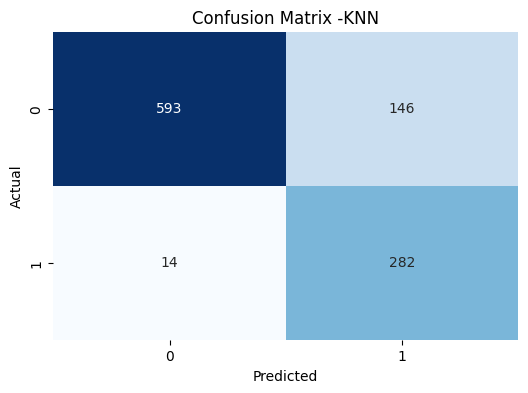


-----------------------SVM Model------------------------------

Confusion Matrix:
 [[707  32]
 [ 23 273]]

Accuracy: 0.9468599033816425

Error Rate: 0.0531400966183575

Precision: 0.8950819672131147

Recall: 0.9222972972972973 




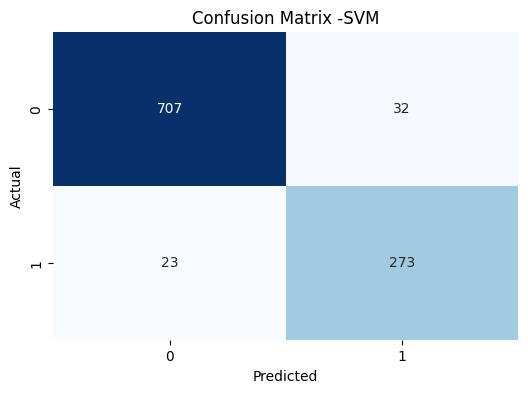

In [18]:
# Step 8: Evaluate Models
def evaluate_model (y_true, y_pred, model_name):
 cm =confusion_matrix(y_true, y_pred)
 accuracy= accuracy_score(y_true, y_pred)
 error_rate= 1- accuracy
 precision= precision_score(y_true, y_pred)
 recall = recall_score(y_true, y_pred)

 print(f"\n-----------------------{model_name} Model------------------------------")
 print("\nConfusion Matrix:\n", cm)
 print("\nAccuracy:", accuracy)
 print("\nError Rate:", error_rate)
 print("\nPrecision:", precision)
 print("\nRecall:", recall, "\n\n")

 # Plot confusion matrix
 plt.figure(figsize=(6,4))
 sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
 plt.xlabel("Predicted")
 plt.ylabel("Actual")
 plt.title(f"Confusion Matrix -{model_name}")
 plt.show()


# Evaluate KNN
evaluate_model (y_test, y_pred_knn, "KNN")

# Evaluate SVM
evaluate_model(y_test, y_pred_svm, "SVM")
print("\n\n")